# Import

In [1]:
%pip install scipy seaborn scikit-learn tensorflow tensorflow_datasets 
%pip install pandas
%pip install matplotlib
%pip install numpy
%pip install sklearn
%pip install xgboost
%pip install gensim
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


  Preparing metadata (setup.py) ... -

 error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-py

Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.7 MB/s eta 0:00:00


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/38.6 MB ? eta -:--:--

   ━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/38.6 MB 124.2 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/38.6 MB 170.5 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━ 26.5/38.6 MB 173.1 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━ 32.5/38.6 MB 174.3 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 38.6/38.6 MB 176.8 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 38.6/38.6 MB 176.8 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 38.6/38.6 MB 176.8 MB/s eta 0:00:01

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 44.1 MB/s eta 0:00:00


  Attempting uninstall: scipy


    Found existing installation: scipy 1.14.1


    Uninstalling scipy-1.14.1:


      Successfully uninstalled scipy-1.14.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cuml 24.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
cesium 0.12.3 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
libpysal 4.9.2 requires packaging>=22, but you have packaging 21.3 which is incompatible.
libpysal 4.9.2 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
tsfresh 0.20.3 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install tf-keras
%pip install tqdm

Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


In [3]:
## Imports
from tqdm import tqdm
import os
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import VotingClassifier
from sklearn.manifold import TSNE
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

from datasets import load_dataset, Dataset
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification, DataCollatorWithPadding, AutoModelForSequenceClassification, TrainingArguments, Trainer

from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.test.utils import datapath, get_tmpfile

import nltk
from nltk import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import logging
from sklearn.svm import SVC

# Load the stop words
stop_words = set(stopwords.words('english'))

# ref: https://www.kaggle.com/code/eswarbabu88/toxic-comment-glove-logistic-regression
# need to use glove_model from above
# Download required NLTK resources
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

# Options: 'LR', 'XGB', 'RF', 'RNN', 'SVM', 'BERT'
# config_option = 'LR' 

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# class MyLogger:
#     def __init__(self, log_file='app.log'):
#         self.log_file = log_file
#         self._initialize_logger()

#     def _initialize_logger(self):
#         # Check if the log file already exists; if so, append to it
#         if os.path.exists(self.log_file):
#             file_mode = 'a'  # Append mode
#         else:
#             file_mode = 'w'  # Write mode (create new file)

#         # Create a logger
#         self.logger = logging.getLogger()
#         self.logger.setLevel(logging.INFO)  # Set logging level to INFO

#         # Create file handler
#         file_handler = logging.FileHandler(self.log_file, mode=file_mode, encoding='utf-8')
#         file_handler.setLevel(logging.INFO)  # Ensure the file handler logs INFO and above

#         # Create console handler
#         console_handler = logging.StreamHandler()
#         console_handler.setLevel(logging.INFO)  # Ensure the console handler logs INFO and above

#         # Set up the logging format
#         formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
#         file_handler.setFormatter(formatter)
#         console_handler.setFormatter(formatter)

#         # Remove existing handlers to avoid duplicates
#         if self.logger.hasHandlers():
#             self.logger.handlers.clear()

#         # Add handlers to the logger
#         self.logger.addHandler(file_handler)
#         self.logger.addHandler(console_handler)

#     def log_message(self, message):
#         self.logger.info(message)

#     def change_log_file(self, new_log_file):
#         """Change the log file and reinitialize the logger."""
#         self.log_file = new_log_file
#         self._initialize_logger()  # Reinitialize logger with the new log file

In [5]:
# Load the stop words
stop_words = set(stopwords.words('english'))

# Load the preprocessing datasets

# Word2Vec Embedding + Logistic Regression

Load the GloVe model in Word2Vec format

In [6]:
path_ds = r"/kaggle/input/pdz-dath-data/final_dataset_v1_afternb1.csv"

df_ds = pd.read_csv(path_ds)

# split train and set dataset 
df_train, df_test = train_test_split(df_ds, test_size=0.2, random_state=42)

df_train.head()

,text,label,source,word_length,text_no_sw
70396,"as a citizen of the united states, i have the ...",0,competition-essay,569,"citizen united states , right poinion electora..."
37844,"dear hiring manager,i am writing to express m...",1,mistral7binstruct_v2,226,"dear hiring manager , writing express interest..."
24861,working in groups can be a valuable experience...,1,llammistral7binstruct,382,working groups valuable experience students . ...
47197,the using of cars has caused much of the world...,0,personal-sunilthite,444,using cars caused much worlds green house gas ...
20172,to teacher_namewe the students should have a r...,0,persuade_corpus,263,teacher_name students right play sport want c ...


In [7]:
print("Test size", df_test.shape)
print("Train size", df_train.shape)

Test size (14211, 5)
Train size (56843, 5)


In [8]:
df = pd.concat([df_test['text_no_sw'], df_train['text_no_sw']], axis=0)

vectorizer = TfidfVectorizer(stop_words='english', max_features=50000)
X = vectorizer.fit_transform(df)

In [9]:
# How to use
# ----------

# .. sourcecode:: pycon

#     >>> from gensim.test.utils import datapath, get_tmpfile
#     >>> from gensim.models import KeyedVectors
#     >>> from gensim.scripts.glove2word2vec import glove2word2vec
#     >>>
#     >>> glove_file = datapath('test_glove.txt')
#     >>> tmp_file = get_tmpfile("test_word2vec.txt")
#     >>>
#     >>> _ = glove2word2vec(glove_file, tmp_file)
#     >>>
#     >>> model = KeyedVectors.load_word2vec_format(tmp_file)

# Command line arguments
# ----------------------

In [10]:
# Use raw strings or escape the backslashes in file paths
# Glove_path = datapath(r"E:\2_LEARNING_BKU\2_File_2\K22_HK241\CO3101_Do_an_Tri_tue_nhan_tao\Main\Code\detect_llm_generated_essay-main\notebooks\Data_baseline\Data Glove\glove.6B.300d.txt")
word2vec_output_file = get_tmpfile(r"/kaggle/input/pdz-dath-data/output_w2v.txt")

# Convert GloVe format to Word2Vec format
# glove2word2vec(Glove_path, word2vec_output_file)

# Load the Stanford GloVe model in Word2Vec format
glove_model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

# Now you can use the glove_model for further processing

In [11]:
print("Glove Word Embeddings of word 'human' ")
glove_model['human']

Glove Word Embeddings of word 'human' 


array([ 1.6608e-01,  3.1670e-01, -5.8249e-01, -3.0978e-01, -4.3342e-02,
       -2.7902e-01, -2.2359e-01,  1.5822e-01,  1.4204e-01, -2.5546e+00,
        1.4570e-01, -2.4335e-01, -7.9048e-01, -7.0345e-02,  3.6125e-02,
        8.6590e-02,  7.9128e-01,  8.8366e-01, -3.8760e-01, -2.5363e-01,
       -2.1893e-01,  2.9416e-01, -1.0171e-01,  1.3125e-01,  1.7897e-01,
        5.8697e-01,  9.8880e-01,  1.3927e-01,  4.0796e-01,  1.0456e-02,
        8.6774e-03,  5.1483e-01, -1.1121e+00, -5.1464e-01,  9.6359e-02,
        1.8087e-01,  3.3565e-01,  2.4491e-01, -2.3970e-01, -3.6623e-01,
        5.1139e-01,  2.0225e-01, -9.9939e-02, -2.1025e-01, -4.4924e-01,
        2.7756e-01, -4.3422e-01,  2.9502e-01,  3.0119e-01,  7.0748e-02,
       -4.7604e-02,  5.4410e-01, -2.1035e-01,  9.3486e-02, -1.6013e-01,
       -6.2257e-02,  1.9005e-01, -4.4857e-01, -1.6407e-01, -2.2538e-01,
        1.6229e-01,  2.2353e-01,  1.4428e-01, -1.4320e-01, -5.4452e-01,
       -1.5810e-01,  1.6613e-01,  3.0517e-01,  2.2682e-01,  2.33

Plot t-distributed stochastic neighbor embedding

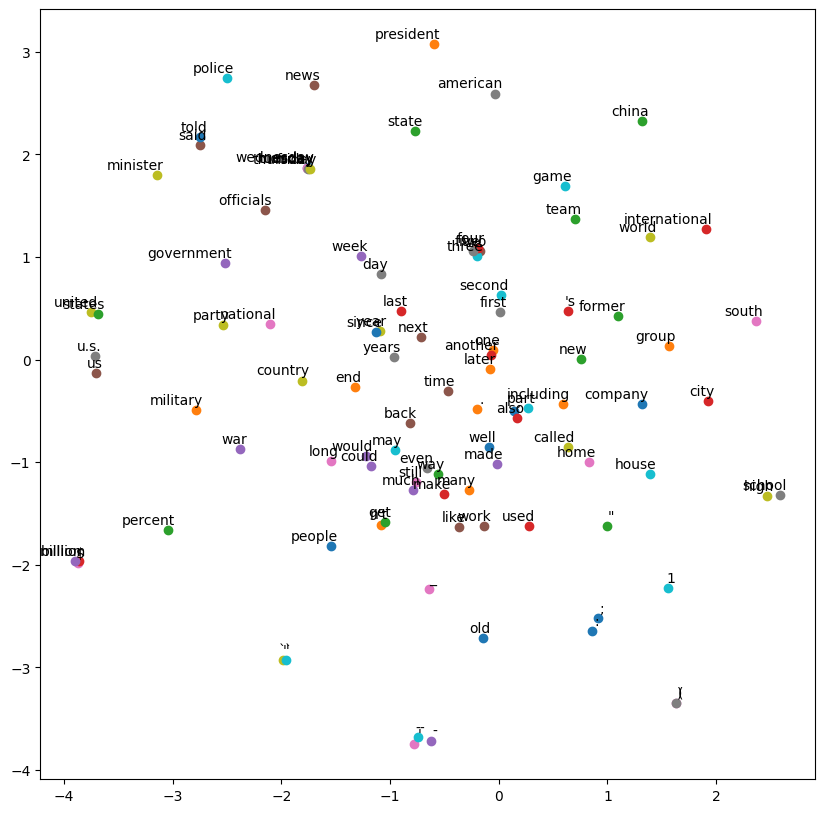

In [12]:
def plot_tsne(model, num):
    labels = []
    tokens = []
    for word in model.key_to_index:
        if word not in stop_words:
            tokens.append(np.array(model[word]))
            labels.append(word)
    tsne = TSNE(perplexity = 40, n_components = 2, init = 'pca', n_iter = 2500, random_state = 23)
    data = tsne.fit_transform(np.array(tokens[:num]))
    x = []
    y = []
    for each in data:
        x.append(each[0])
        y.append(each[1])
    plt.figure(figsize = (10, 10))
    for i in range(num):
        plt.scatter(x[i], y[i])
        plt.annotate(labels[i],
                     xy = (x[i], y[i]),
                     xytext = (5,2),
                     textcoords = 'offset points',
                     ha = 'right',
                     va = 'bottom')
    plt.show()
    
# visualising the cbow archtecture(only the first 300)
plot_tsne(glove_model, 100)

In [13]:
# Load stopwords
stop_words = set(stopwords.words('english'))

# Assuming glove_model is already loaded in your environment
# Function to convert a sentence to a vector
def sent2vec(s):
    words = str(s).lower()
    words = word_tokenize(words)  # This requires the 'punkt' tokenizer
    words = [w for w in words if w not in stop_words]
    words = [w for w in words if w.isalpha()]  # Filter out non-alphabetic tokens
    M = []
    for w in words:
        try:
            M.append(glove_model[w])  # Lookup word in GloVe model
        except KeyError:
            continue
    M = np.array(M)
    v = M.sum(axis=0)
    if type(v) != np.ndarray:
        return np.zeros(300)  # Return a zero vector if no word embeddings are found
    return v / np.sqrt((v ** 2).sum())  # Normalize the vector


In [14]:
df = pd.concat([df_test['text_no_sw'], df_train['text_no_sw']], axis=0)
X = vectorizer.fit_transform(df)

Start Logistic Regression

In [15]:
X

<71054x50000 sparse matrix of type '<class 'numpy.float64'>'
	with 6962619 stored elements in Compressed Sparse Row format>

In [16]:
print(X[:df_train.shape[0]].shape)  # Features
print(df_train['label'].shape)      # Labels

(56843, 50000)
(56843,)


In [17]:
# Define metrics calculation function
def compute_metrics(preds, labels):
    # Compute probabilities
    probs = preds if len(preds.shape) == 1 else preds[:, 1]
    
    # Compute ROC AUC score
    auc = roc_auc_score(labels, probs)
    
    # Convert probabilities to binary predictions (1 if prob >= 0.5 else 0)
    binary_preds = (probs >= 0.5).astype(int)
    
    # other metrics
    accuracy = accuracy_score(labels, binary_preds)
    precision = precision_score(labels, binary_preds)
    recall = recall_score(labels, binary_preds)
    f1 = f1_score(labels, binary_preds)
    
    return {"roc_auc": auc, "accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

Train Step

In [18]:
# Path to save the model
model_file_path = r"/kaggle/working/LR_save.pkl"

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True)

# Check if the model already exists
if os.path.exists(model_file_path):
    print("Loading model from file...")
    model = joblib.load(model_file_path)
else:
    print("Model not found. Training a new model...")

    # Initialize the model (choose either Logistic Regression or XGBoost)
    # Uncomment one of the lines below based on the model you want to use
    model = LogisticRegression()  # Logistic Regression
    # model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')  # XGBoost
    # model = RandomForestClassifier(n_estimators=100, random_state=42)  # Set random_state for reproducibility
    
    # Define number of epochs
    n_epochs = 10

    # Initialize lists for storing metrics and epoch results
    train_metrics = {'accuracy': [], 'roc_auc': [], 'precision': [], 'recall': [], 'f1': []}
    val_metrics = {'accuracy': [], 'roc_auc': [], 'precision': [], 'recall': [], 'f1': []}

    # Loop over epochs with tqdm to track progress
    for epoch in tqdm(range(n_epochs), desc="Epochs", unit="epoch"):
        epoch_train_metrics = {'accuracy': [], 'roc_auc': [], 'precision': [], 'recall': [], 'f1': []}  # Initialize for this epoch
        epoch_val_metrics = {'accuracy': [], 'roc_auc': [], 'precision': [], 'recall': [], 'f1': []}    # Initialize for this epoch
        
        for train_idx, val_idx in cv.split(X[:df_train.shape[0]], df_train['label']):
            # Split the data into training and validation for each fold
            X_train, X_val = X[:df_train.shape[0]][train_idx], X[:df_train.shape[0]][val_idx]
            y_train, y_val = df_train['label'].iloc[train_idx], df_train['label'].iloc[val_idx]

            # Train the model on the training data
            model.fit(X_train, y_train)
            
            # Predict probabilities for the training data
            preds_train = model.predict_proba(X_train)[:, 1]
            # Predict probabilities for the validation data
            preds_val = model.predict_proba(X_val)[:, 1]
            
            # Compute and store metrics for training set
            train_metrics_epoch = compute_metrics(preds_train, y_train)
            for key, value in train_metrics_epoch.items():
                epoch_train_metrics[key].append(value)  # Store metrics for this fold
            
            # Compute and store metrics for validation set
            val_metrics_epoch = compute_metrics(preds_val, y_val)
            for key, value in val_metrics_epoch.items():
                epoch_val_metrics[key].append(value)  # Store metrics for this fold

        # Average the metrics across folds for this epoch
        for key in train_metrics.keys():
            train_metrics[key].append(np.mean(epoch_train_metrics[key]))
            val_metrics[key].append(np.mean(epoch_val_metrics[key]))

        print(f"Epoch {epoch+1} - Training Metrics: {train_metrics_epoch}")
        print(f"Epoch {epoch+1} - Validation Metrics: {val_metrics_epoch}")

    # Save the trained model to a file
    joblib.dump(model, model_file_path)
    print(f"Model saved to {model_file_path}")

Model not found. Training a new model...


Epochs:   0%|          | 0/10 [00:00<?, ?epoch/s]

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
Epochs:  10%|█         | 1/10 [00:51<07:41, 51.31s/epoch]

Epoch 1 - Training Metrics: {'roc_auc': 0.7392497570498644, 'accuracy': 0.6585596481583288, 'precision': 0.7705588368923216, 'recall': 0.18940197665978, 'f1': 0.3040652592891399}
Epoch 1 - Validation Metrics: {'roc_auc': 0.49041190130357826, 'accuracy': 0.5839197748064743, 'precision': 0.3733733733733734, 'recall': 0.08331471967835605, 'f1': 0.13623082542001463}


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
Epochs:  20%|██        | 2/10 [01:41<06:45, 50.69s/epoch]

Epoch 2 - Training Metrics: {'roc_auc': 0.739044451783529, 'accuracy': 0.6600549752611324, 'precision': 0.7803203661327232, 'recall': 0.19040705790384724, 'f1': 0.3061178688451008}
Epoch 2 - Validation Metrics: {'roc_auc': 0.4940055441302127, 'accuracy': 0.5899014778325123, 'precision': 0.4085064292779426, 'recall': 0.09224927406745588, 'f1': 0.15051020408163265}


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
Epochs:  30%|███       | 3/10 [02:33<05:57, 51.05s/epoch]

Epoch 3 - Training Metrics: {'roc_auc': 0.7371468653709162, 'accuracy': 0.6605387575590984, 'precision': 0.7695159180113389, 'recall': 0.19705176168406946, 'f1': 0.3137586130251167}
Epoch 3 - Validation Metrics: {'roc_auc': 0.4917513551502549, 'accuracy': 0.5822484166080225, 'precision': 0.36770428015564205, 'recall': 0.08443153897699353, 'f1': 0.13732970027247957}


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
Epochs:  40%|████      | 4/10 [03:23<05:05, 50.92s/epoch]

Epoch 4 - Training Metrics: {'roc_auc': 0.7387830352135307, 'accuracy': 0.6589774601429357, 'precision': 0.7711768692116557, 'recall': 0.19063040929141772, 'f1': 0.30569484240687683}
Epoch 4 - Validation Metrics: {'roc_auc': 0.49561014329289155, 'accuracy': 0.5880541871921182, 'precision': 0.3946830265848671, 'recall': 0.08621844985481349, 'f1': 0.14152153987167734}


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
Epochs:  50%|█████     | 5/10 [04:19<04:23, 52.71s/epoch]

Epoch 5 - Training Metrics: {'roc_auc': 0.7372005287300833, 'accuracy': 0.6588894997251237, 'precision': 0.7765981998615278, 'recall': 0.18789435479367916, 'f1': 0.30258070317417496}
Epoch 5 - Validation Metrics: {'roc_auc': 0.503087257411079, 'accuracy': 0.5913969035890219, 'precision': 0.4148073022312373, 'recall': 0.0913558186285459, 'f1': 0.14973457807065715}


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
Epochs:  60%|██████    | 6/10 [05:10<03:28, 52.18s/epoch]

Epoch 6 - Training Metrics: {'roc_auc': 0.7359426843035939, 'accuracy': 0.6600109950522265, 'precision': 0.7834645669291339, 'recall': 0.1888994360377464, 'f1': 0.3044045530211005}
Epoch 6 - Validation Metrics: {'roc_auc': 0.49404854110596774, 'accuracy': 0.5862068965517241, 'precision': 0.3856998992950655, 'recall': 0.08554835827563101, 'f1': 0.14003656307129803}


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
Epochs:  70%|███████   | 7/10 [06:04<02:37, 52.61s/epoch]

Epoch 7 - Training Metrics: {'roc_auc': 0.7373633003278034, 'accuracy': 0.6591313908741067, 'precision': 0.7769089236430543, 'recall': 0.18862024680328326, 'f1': 0.30354495214988547}
Epoch 7 - Validation Metrics: {'roc_auc': 0.4979609579680819, 'accuracy': 0.5896375791695989, 'precision': 0.40674603174603174, 'recall': 0.0915791824882734, 'f1': 0.14949863263445762}


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
Epochs:  80%|████████  | 8/10 [06:59<01:46, 53.29s/epoch]

Epoch 8 - Training Metrics: {'roc_auc': 0.737933741278709, 'accuracy': 0.6580318856514569, 'precision': 0.7754672897196262, 'recall': 0.18532581383661845, 'f1': 0.2991572400739105}
Epoch 8 - Validation Metrics: {'roc_auc': 0.49831524137931704, 'accuracy': 0.5875263898662914, 'precision': 0.3933601609657948, 'recall': 0.08733526915345097, 'f1': 0.1429354779747761}


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
Epochs:  90%|█████████ | 9/10 [07:49<00:52, 52.40s/epoch]

Epoch 9 - Training Metrics: {'roc_auc': 0.7391424556516013, 'accuracy': 0.6589554700384826, 'precision': 0.7805049088359046, 'recall': 0.18644257077447093, 'f1': 0.3009870644972281}
Epoch 9 - Validation Metrics: {'roc_auc': 0.49842165605809885, 'accuracy': 0.5873504574243491, 'precision': 0.39081632653061227, 'recall': 0.08554835827563101, 'f1': 0.14037016675829211}


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
Epochs: 100%|██████████| 10/10 [08:39<00:00, 51.53s/epoch]

Epochs: 100%|██████████| 10/10 [08:39<00:00, 51.91s/epoch]

Epoch 10 - Training Metrics: {'roc_auc': 0.7371075443129507, 'accuracy': 0.657372182517867, 'precision': 0.7705718270571827, 'recall': 0.18510246244904796, 'f1': 0.298500742875152}
Epoch 10 - Validation Metrics: {'roc_auc': 0.5030478097522069, 'accuracy': 0.5881421534130894, 'precision': 0.4019138755980861, 'recall': 0.09381282108554836, 'f1': 0.15211879753712426}
Model saved to /kaggle/working/LR_save.pkl


In [19]:
# import os

# # Specify the path to the file you want to remove
# file_path = "/kaggle/working/LR_save.pkl"

# # Remove the file
# if os.path.exists(file_path):
#     os.remove(file_path)
#     print(f"File {file_path} has been removed.")
# else:
#     print(f"File {file_path} does not exist.")

In [20]:
base_path = r"/kaggle/working/"

In [21]:
# len(train_metrics['accuracy'])

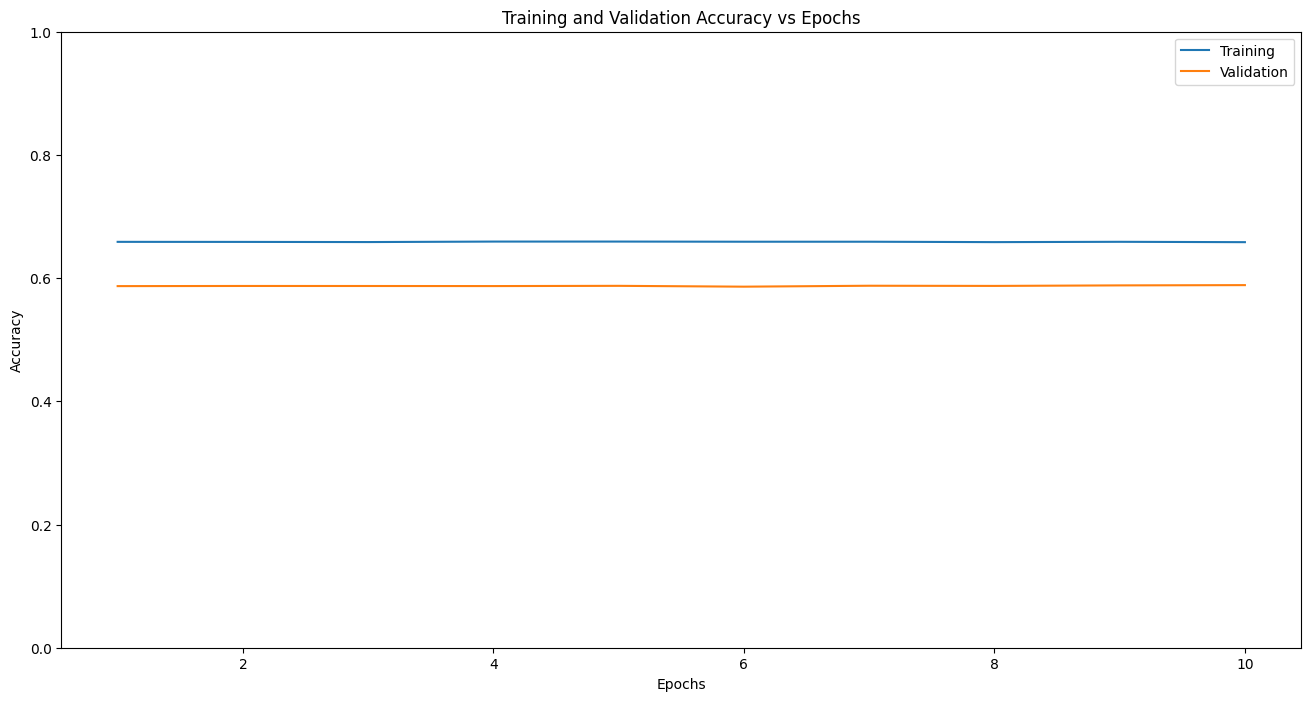

Plot saved as /kaggle/working/LR.png


In [22]:
# Path to save the image
base_path = r"/kaggle/working/" 

# Plotting Accuracy vs. Epochs for training and validation sets
def plot_graphs(metrics_dict, metric_name, label):
    plt.plot(np.arange(1, n_epochs + 1), metrics_dict[metric_name], label=label)

# Create a plot and save it as an image
plt.figure(figsize=(16, 8))

# Plot for training and validation metrics together
plt.subplot(1, 1, 1)  # Single subplot
plot_graphs(train_metrics, 'accuracy', 'Training')
plot_graphs(val_metrics, 'accuracy', 'Validation')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs Epochs')
plt.ylim(0, 1)
plt.legend()  # Add legend to differentiate between training and validation

# Save the plot to file
image_file_path = os.path.join(base_path, "LR.png")  # This will save in the current working directory
plt.savefig(image_file_path)

# Show the plot (optional)
plt.show()

print(f"Plot saved as {image_file_path}")

Test Dataset

In [23]:
# Evaluation on test set after training
print("Evaluating on test set...")

# Predict probabilities for the test data
X_test = X[df_train.shape[0]:]  # Extract the test data portion
y_test = df_test['label']  # Assuming df_test contains the test labels

# Predict probabilities for the test data
preds_test = model.predict_proba(X_test)[:, 1]

# Compute metrics on the test set
test_metrics = compute_metrics(preds_test, y_test)

# Print the test set metrics
print("Test Set Metrics:")
for key, value in test_metrics.items():
    print(f"{key}: {value:.4f}")

Evaluating on test set...
Test Set Metrics:
roc_auc: 0.4993
accuracy: 0.5897
precision: 0.4184
recall: 0.0887
f1: 0.1464


# Word2Vec Embedding + XGBoost

In [24]:
# import os

# # Specify the path to the file you want to remove
# file_path = "/kaggle/working/XGB_save.pkl"

# # Remove the file
# if os.path.exists(file_path):
#     os.remove(file_path)
#     print(f"File {file_path} has been removed.")
# else:
#     print(f"File {file_path} does not exist.")

In [25]:
# Path to save the model
model_file_path = r"/kaggle/working/XGB_save.pkl"

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True)

# Check if the model already exists
if os.path.exists(model_file_path):
    print("Loading model from file...")
    model = joblib.load(model_file_path)
else:
    print("Model not found. Training a new model...")

    # Initialize the model (choose either Logistic Regression or XGBoost)
    # Uncomment one of the lines below based on the model you want to use
    # model = LogisticRegression()  # Logistic Regression
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')  # XGBoost
    # model = RandomForestClassifier(n_estimators=100, random_state=42)  # Set random_state for reproducibility
    
    # Define number of epochs
    n_epochs = 10

    # Initialize lists for storing metrics and epoch results
    train_metrics = {'accuracy': [], 'roc_auc': [], 'precision': [], 'recall': [], 'f1': []}
    val_metrics = {'accuracy': [], 'roc_auc': [], 'precision': [], 'recall': [], 'f1': []}

    # Loop over epochs with tqdm to track progress
    for epoch in tqdm(range(n_epochs), desc="Epochs", unit="epoch"):
        epoch_train_metrics = {'accuracy': [], 'roc_auc': [], 'precision': [], 'recall': [], 'f1': []}  # Initialize for this epoch
        epoch_val_metrics = {'accuracy': [], 'roc_auc': [], 'precision': [], 'recall': [], 'f1': []}    # Initialize for this epoch
        
        for train_idx, val_idx in cv.split(X[:df_train.shape[0]], df_train['label']):
            # Split the data into training and validation for each fold
            X_train, X_val = X[:df_train.shape[0]][train_idx], X[:df_train.shape[0]][val_idx]
            y_train, y_val = df_train['label'].iloc[train_idx], df_train['label'].iloc[val_idx]

            # Train the model on the training data
            model.fit(X_train, y_train)
            
            # Predict probabilities for the training data
            preds_train = model.predict_proba(X_train)[:, 1]
            # Predict probabilities for the validation data
            preds_val = model.predict_proba(X_val)[:, 1]
            
            # Compute and store metrics for training set
            train_metrics_epoch = compute_metrics(preds_train, y_train)
            for key, value in train_metrics_epoch.items():
                epoch_train_metrics[key].append(value)  # Store metrics for this fold
            
            # Compute and store metrics for validation set
            val_metrics_epoch = compute_metrics(preds_val, y_val)
            for key, value in val_metrics_epoch.items():
                epoch_val_metrics[key].append(value)  # Store metrics for this fold

        # Average the metrics across folds for this epoch
        for key in train_metrics.keys():
            train_metrics[key].append(np.mean(epoch_train_metrics[key]))
            val_metrics[key].append(np.mean(epoch_val_metrics[key]))

        print(f"Epoch {epoch+1} - Training Metrics: {train_metrics_epoch}")
        print(f"Epoch {epoch+1} - Validation Metrics: {val_metrics_epoch}")

    # Save the trained model to a file
    joblib.dump(model, model_file_path)
    print(f"Model saved to {model_file_path}")

Model not found. Training a new model...


Epochs:   0%|          | 0/10 [00:00<?, ?epoch/s]

Epochs:  10%|█         | 1/10 [04:04<36:37, 244.19s/epoch]

Epoch 1 - Training Metrics: {'roc_auc': 0.8128576898111957, 'accuracy': 0.7010005497526113, 'precision': 0.9092634776006074, 'recall': 0.2674632866156681, 'f1': 0.41334081201190837}
Epoch 1 - Validation Metrics: {'roc_auc': 0.49610445454827456, 'accuracy': 0.5842716396903589, 'precision': 0.3954659949622166, 'recall': 0.10520437793165066, 'f1': 0.16619618913196896}


Epochs:  20%|██        | 2/10 [08:04<32:17, 242.20s/epoch]

Epoch 2 - Training Metrics: {'roc_auc': 0.8199061140262796, 'accuracy': 0.7059263331500825, 'precision': 0.9089433826181031, 'recall': 0.2814785861857167, 'f1': 0.4298443828607973}
Epoch 2 - Validation Metrics: {'roc_auc': 0.49250418308874, 'accuracy': 0.5803131597466573, 'precision': 0.37911184210526316, 'recall': 0.1029707393343757, 'f1': 0.16195327595292464}


Epochs:  30%|███       | 3/10 [12:13<28:34, 244.86s/epoch]

Epoch 3 - Training Metrics: {'roc_auc': 0.8248428918945537, 'accuracy': 0.7068499175371084, 'precision': 0.906139105748758, 'recall': 0.28516388408062987, 'f1': 0.433807602463368}
Epoch 3 - Validation Metrics: {'roc_auc': 0.49895633876715917, 'accuracy': 0.5812807881773399, 'precision': 0.3919022154316272, 'recall': 0.1145856600402055, 'f1': 0.1773245765641203}


Epochs:  40%|████      | 4/10 [16:20<24:35, 245.90s/epoch]

Epoch 4 - Training Metrics: {'roc_auc': 0.8170577366537328, 'accuracy': 0.7021660252886202, 'precision': 0.9103214890016921, 'recall': 0.27036685465408455, 'f1': 0.4169106251076287}
Epoch 4 - Validation Metrics: {'roc_auc': 0.49982895209871103, 'accuracy': 0.5830401125967628, 'precision': 0.3921246923707957, 'recall': 0.10676792494974313, 'f1': 0.1678370786516854}


Epochs:  50%|█████     | 5/10 [20:25<20:28, 245.72s/epoch]

Epoch 5 - Training Metrics: {'roc_auc': 0.816308861108985, 'accuracy': 0.7024738867509621, 'precision': 0.9031485914196281, 'recall': 0.27388463900831983, 'f1': 0.42030848329048837}
Epoch 5 - Validation Metrics: {'roc_auc': 0.5006921167921682, 'accuracy': 0.5823363828289937, 'precision': 0.39664378337147216, 'recall': 0.11614920705829797, 'f1': 0.17968210089841052}


Epochs:  60%|██████    | 6/10 [24:38<16:32, 248.04s/epoch]

Epoch 6 - Training Metrics: {'roc_auc': 0.8226690189404544, 'accuracy': 0.7070698185816383, 'precision': 0.9158810732414794, 'recall': 0.28209280250153557, 'f1': 0.4313340448239061}
Epoch 6 - Validation Metrics: {'roc_auc': 0.5023316094673993, 'accuracy': 0.5843596059113301, 'precision': 0.4025157232704403, 'recall': 0.114362296180478, 'f1': 0.17811793355366148}


Epochs:  70%|███████   | 7/10 [28:51<12:28, 249.62s/epoch]

Epoch 7 - Training Metrics: {'roc_auc': 0.820174433860524, 'accuracy': 0.7042550852116548, 'precision': 0.9063411078717201, 'recall': 0.2777374504439109, 'f1': 0.4251827157327863}
Epoch 7 - Validation Metrics: {'roc_auc': 0.4993028428537195, 'accuracy': 0.5850633356790992, 'precision': 0.4043062200956938, 'recall': 0.11324547688184051, 'f1': 0.1769324725178852}


Epochs:  80%|████████  | 8/10 [33:04<08:21, 250.61s/epoch]

Epoch 8 - Training Metrics: {'roc_auc': 0.8117616031667704, 'accuracy': 0.7009785596481584, 'precision': 0.9128519440720169, 'recall': 0.2661231782902451, 'f1': 0.4121054907047125}
Epoch 8 - Validation Metrics: {'roc_auc': 0.5001561861497746, 'accuracy': 0.5864707952146376, 'precision': 0.4075907590759076, 'recall': 0.11034174670538308, 'f1': 0.17366848303744067}


Epochs:  90%|█████████ | 9/10 [37:13<04:10, 250.12s/epoch]

Epoch 9 - Training Metrics: {'roc_auc': 0.8212478367594501, 'accuracy': 0.7065420560747664, 'precision': 0.9099892202659001, 'recall': 0.28281869451113967, 'f1': 0.4315228966986156}
Epoch 9 - Validation Metrics: {'roc_auc': 0.5020412947946885, 'accuracy': 0.5836558761435608, 'precision': 0.4027355623100304, 'recall': 0.11838284565557293, 'f1': 0.18297945796651133}


Epochs: 100%|██████████| 10/10 [41:19<00:00, 248.94s/epoch]

Epochs: 100%|██████████| 10/10 [41:19<00:00, 247.94s/epoch]

Epoch 10 - Training Metrics: {'roc_auc': 0.8240118000526065, 'accuracy': 0.7062781748213304, 'precision': 0.9049822064056939, 'recall': 0.28399128929588474, 'f1': 0.4323175655573972}
Epoch 10 - Validation Metrics: {'roc_auc': 0.5009791738726712, 'accuracy': 0.5780260380014075, 'precision': 0.37767584097859325, 'recall': 0.11034174670538308, 'f1': 0.1707865168539326}
Model saved to /kaggle/working/XGB_save.pkl


In [26]:
# len(train_metrics['accuracy'])

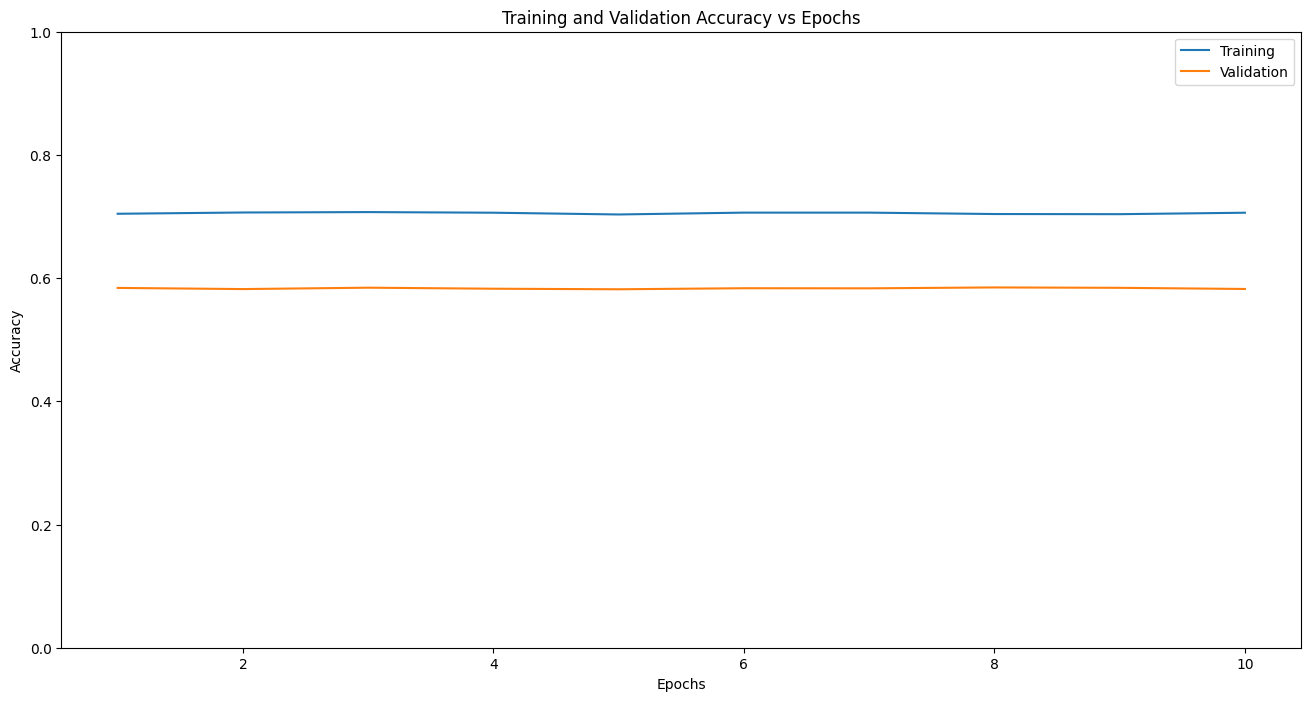

Plot saved as /kaggle/working/XGB.png


In [27]:
# Create a plot and save it as an image
plt.figure(figsize=(16, 8))

# Plot for training and validation metrics together
plt.subplot(1, 1, 1)  # Single subplot
plot_graphs(train_metrics, 'accuracy', 'Training')
plot_graphs(val_metrics, 'accuracy', 'Validation')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs Epochs')
plt.ylim(0, 1)
plt.legend()  # Add legend to differentiate between training and validation

# Save the plot to file
image_file_path = os.path.join(base_path, "XGB.png")  # This will save in the current working directory
plt.savefig(image_file_path)

# Show the plot (optional)
plt.show()

print(f"Plot saved as {image_file_path}")

In [28]:
# Evaluation on test set after training
print("Evaluating on test set...")

# Predict probabilities for the test data
X_test = X[df_train.shape[0]:]  # Extract the test data portion
y_test = df_test['label']  # Assuming df_test contains the test labels

# Predict probabilities for the test data
preds_test = model.predict_proba(X_test)[:, 1]

# Compute metrics on the test set
test_metrics = compute_metrics(preds_test, y_test)

# Print the test set metrics
print("Test Set Metrics:")
for key, value in test_metrics.items():
    print(f"{key}: {value:.4f}")

Evaluating on test set...
Test Set Metrics:
roc_auc: 0.5043
accuracy: 0.5824
precision: 0.4093
recall: 0.1192
f1: 0.1847


# Word2Vec Embedding + Random Forest

In [29]:
import time

# Path to save the model
model_file_path = r"/kaggle/working/RF_save.pkl"

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=3, shuffle=True)

# Check if the model already exists
if os.path.exists(model_file_path):
    print("Loading model from file...")
    model = joblib.load(model_file_path)
else:
    print("Model not found. Training a new model...")

    # Initialize the model (choose either Logistic Regression or XGBoost)
    # Uncomment one of the lines below based on the model you want to use
    # model = LogisticRegression()  # Logistic Regression
    # model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')  # XGBoost
    model = RandomForestClassifier(n_estimators=20, random_state=42)  # Set random_state for reproducibility
    
    # Define number of epochs
    n_epochs = 10

    # Initialize lists for storing metrics and epoch results
    train_metrics = {'accuracy': [], 'roc_auc': [], 'precision': [], 'recall': [], 'f1': []}
    val_metrics = {'accuracy': [], 'roc_auc': [], 'precision': [], 'recall': [], 'f1': []}

    # Loop over epochs with tqdm to track progress
    for epoch in tqdm(range(n_epochs), desc="Epochs", unit="epoch"):
        epoch_train_metrics = {'accuracy': [], 'roc_auc': [], 'precision': [], 'recall': [], 'f1': []}  # Initialize for this epoch
        epoch_val_metrics = {'accuracy': [], 'roc_auc': [], 'precision': [], 'recall': [], 'f1': []}    # Initialize for this epoch
        
        for train_idx, val_idx in cv.split(X[:df_train.shape[0]], df_train['label']):
            # Split the data into training and validation for each fold
            X_train, X_val = X[:df_train.shape[0]][train_idx], X[:df_train.shape[0]][val_idx]
            y_train, y_val = df_train['label'].iloc[train_idx], df_train['label'].iloc[val_idx]

            # Train the model on the training data
            start = time.time()
            model.fit(X_train, y_train)
            print(f"Model fit time: {time.time() - start} seconds")
            
            # Predict probabilities for the training data
            preds_train = model.predict_proba(X_train)[:, 1]
            # Predict probabilities for the validation data
            preds_val = model.predict_proba(X_val)[:, 1]
            
            # Compute and store metrics for training set
            train_metrics_epoch = compute_metrics(preds_train, y_train)
            for key, value in train_metrics_epoch.items():
                epoch_train_metrics[key].append(value)  # Store metrics for this fold
            
            # Compute and store metrics for validation set
            val_metrics_epoch = compute_metrics(preds_val, y_val)
            for key, value in val_metrics_epoch.items():
                epoch_val_metrics[key].append(value)  # Store metrics for this fold

        # Average the metrics across folds for this epoch
        for key in train_metrics.keys():
            train_metrics[key].append(np.mean(epoch_train_metrics[key]))
            val_metrics[key].append(np.mean(epoch_val_metrics[key]))

        print(f"Epoch {epoch+1} - Training Metrics: {train_metrics_epoch}")
        print(f"Epoch {epoch+1} - Validation Metrics: {val_metrics_epoch}")

    # Save the trained model to a file
    joblib.dump(model, model_file_path)
    print(f"Model saved to {model_file_path}")

Model not found. Training a new model...


Epochs:   0%|          | 0/10 [00:00<?, ?epoch/s]

Model fit time: 292.34315633773804 seconds


Model fit time: 294.93979001045227 seconds


Model fit time: 278.4537703990936 seconds


Epochs:  10%|█         | 1/10 [14:30<2:10:37, 870.85s/epoch]

Epoch 1 - Training Metrics: {'roc_auc': 0.9842552810261643, 'accuracy': 0.9185402153261558, 'precision': 0.9126403123474865, 'recall': 0.8771106941838649, 'f1': 0.8945228414254964}
Epoch 1 - Validation Metrics: {'roc_auc': 0.5066323676005446, 'accuracy': 0.5564469309125455, 'precision': 0.40228215767634856, 'recall': 0.2598499061913696, 'f1': 0.3157466210714867}


Model fit time: 278.93045687675476 seconds


Model fit time: 280.44918274879456 seconds


Model fit time: 285.31034803390503 seconds


Epochs:  20%|██        | 2/10 [28:40<1:54:26, 858.29s/epoch]

Epoch 2 - Training Metrics: {'roc_auc': 0.9834414618138599, 'accuracy': 0.9171944268524382, 'precision': 0.90736900317987, 'recall': 0.8795229161082819, 'f1': 0.8932289894521945}
Epoch 2 - Validation Metrics: {'roc_auc': 0.4957965518983602, 'accuracy': 0.5536496542988336, 'precision': 0.3943960942475058, 'recall': 0.2489949075314929, 'f1': 0.30526575207426265}


Model fit time: 271.9833824634552 seconds


Model fit time: 272.7562906742096 seconds


Model fit time: 276.2460741996765 seconds


Epochs:  30%|███       | 3/10 [42:26<1:38:24, 843.45s/epoch]

Epoch 3 - Training Metrics: {'roc_auc': 0.9835919835845514, 'accuracy': 0.9179860671310957, 'precision': 0.9084059173233789, 'recall': 0.880528008576789, 'f1': 0.8942497448111603}
Epoch 3 - Validation Metrics: {'roc_auc': 0.5037100937012805, 'accuracy': 0.5547052303794796, 'precision': 0.39686905013750795, 'recall': 0.25140712945590993, 'f1': 0.3078185248994995}


Model fit time: 267.1607847213745 seconds


Model fit time: 282.5797691345215 seconds


Model fit time: 262.8303999900818 seconds


Epochs:  40%|████      | 4/10 [56:03<1:23:18, 833.16s/epoch]

Epoch 4 - Training Metrics: {'roc_auc': 0.9842925133171107, 'accuracy': 0.9191999155583703, 'precision': 0.9087525844245348, 'recall': 0.8835432859823104, 'f1': 0.8959706461914793}
Epoch 4 - Validation Metrics: {'roc_auc': 0.5035653347151909, 'accuracy': 0.5532274238665752, 'precision': 0.39767394409304224, 'recall': 0.2611900294827124, 'f1': 0.31529564021677586}


Model fit time: 269.5972309112549 seconds


Model fit time: 274.04602694511414 seconds


Model fit time: 261.9059827327728 seconds


Epochs:  50%|█████     | 5/10 [1:09:33<1:08:44, 824.94s/epoch]

Epoch 5 - Training Metrics: {'roc_auc': 0.9842074459401545, 'accuracy': 0.9186721553725987, 'precision': 0.9077262085112243, 'recall': 0.8832752613240418, 'f1': 0.8953338314202267}
Epoch 5 - Validation Metrics: {'roc_auc': 0.5025007330713607, 'accuracy': 0.5581358526415792, 'precision': 0.4045721476510067, 'recall': 0.2585097829000268, 'f1': 0.31545380212591984}


Model fit time: 272.8060133457184 seconds


Model fit time: 271.73081612586975 seconds


Model fit time: 268.6306805610657 seconds


Epochs:  60%|██████    | 6/10 [1:23:11<54:50, 822.54s/epoch]  

Epoch 6 - Training Metrics: {'roc_auc': 0.9839757347611555, 'accuracy': 0.91827633523327, 'precision': 0.9074061315880124, 'recall': 0.8825381935138032, 'f1': 0.8947994157410237}
Epoch 6 - Validation Metrics: {'roc_auc': 0.5099465152535435, 'accuracy': 0.5599303319786774, 'precision': 0.40809903483004617, 'recall': 0.2606539801661753, 'f1': 0.31812234216552177}


Model fit time: 268.4070973396301 seconds


Model fit time: 265.7601683139801 seconds


Model fit time: 265.8697955608368 seconds


Epochs:  70%|███████   | 7/10 [1:36:36<40:50, 816.74s/epoch]

Epoch 7 - Training Metrics: {'roc_auc': 0.9844412966377722, 'accuracy': 0.9196221237069876, 'precision': 0.9098688750862663, 'recall': 0.8834092736531761, 'f1': 0.8964438702658598}
Epoch 7 - Validation Metrics: {'roc_auc': 0.5029582011053071, 'accuracy': 0.5564997097165778, 'precision': 0.4020811654526535, 'recall': 0.2589118198874296, 'f1': 0.3149914404499877}


Model fit time: 274.4381113052368 seconds


Model fit time: 269.0723569393158 seconds


Model fit time: 267.62060832977295 seconds


Epochs:  80%|████████  | 8/10 [1:50:12<27:13, 816.51s/epoch]

Epoch 8 - Training Metrics: {'roc_auc': 0.9841278476803219, 'accuracy': 0.9186721553725987, 'precision': 0.9120389700765483, 'recall': 0.8781827928169391, 'f1': 0.8947907421314946}
Epoch 8 - Validation Metrics: {'roc_auc': 0.5074748833357623, 'accuracy': 0.556341373304481, 'precision': 0.4021153048527582, 'recall': 0.2598499061913696, 'f1': 0.3156952132855747}


Model fit time: 266.8439939022064 seconds


Model fit time: 278.50022196769714 seconds


Model fit time: 267.1441385746002 seconds


Epochs:  90%|█████████ | 9/10 [2:03:49<13:36, 816.76s/epoch]

Epoch 9 - Training Metrics: {'roc_auc': 0.9840994141050041, 'accuracy': 0.9188568714376187, 'precision': 0.9091222981838271, 'recall': 0.8821361565264004, 'f1': 0.8954259479680327}
Epoch 9 - Validation Metrics: {'roc_auc': 0.5098436110540977, 'accuracy': 0.5567108249327071, 'precision': 0.40217164334934224, 'recall': 0.258107745912624, 'f1': 0.31442331238266263}


Model fit time: 275.509970664978 seconds


Model fit time: 269.4536006450653 seconds


Model fit time: 267.051127910614 seconds


Epochs: 100%|██████████| 10/10 [2:17:26<00:00, 816.75s/epoch]

Epochs: 100%|██████████| 10/10 [2:17:26<00:00, 824.66s/epoch]

Epoch 10 - Training Metrics: {'roc_auc': 0.983965808678184, 'accuracy': 0.9186985433818873, 'precision': 0.9106734170192108, 'recall': 0.8798579469311176, 'f1': 0.8950005111951743}
Epoch 10 - Validation Metrics: {'roc_auc': 0.5002767526706493, 'accuracy': 0.5534385390827044, 'precision': 0.39237233354880413, 'recall': 0.24403645135352453, 'f1': 0.3009171279847972}
Model saved to /kaggle/working/RF_save.pkl


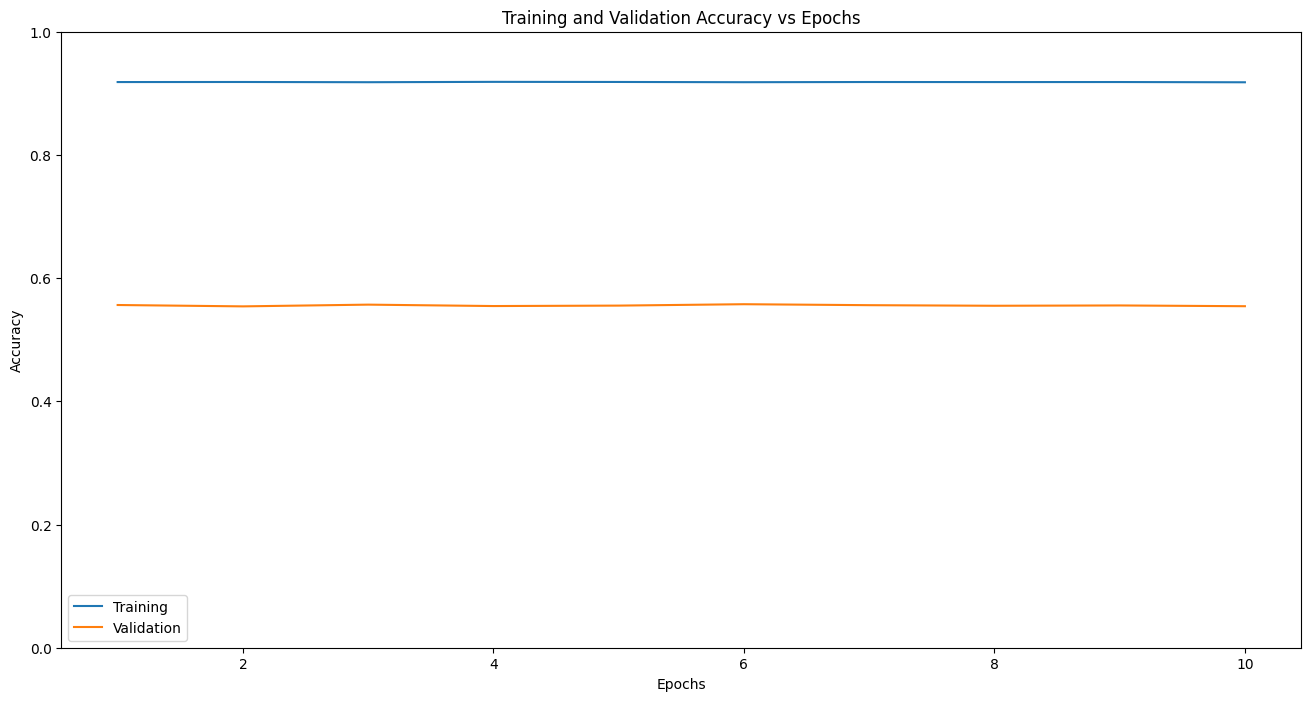

Plot saved as /kaggle/working/RF.png


In [30]:
# Create a plot and save it as an image
plt.figure(figsize=(16, 8))

# Plot for training and validation metrics together
plt.subplot(1, 1, 1)  # Single subplot
plot_graphs(train_metrics, 'accuracy', 'Training')
plot_graphs(val_metrics, 'accuracy', 'Validation')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs Epochs')
plt.ylim(0, 1)
plt.legend()  # Add legend to differentiate between training and validation

# Save the plot to file
image_file_path = os.path.join(base_path, "RF.png")  # This will save in the current working directory
plt.savefig(image_file_path)

# Show the plot (optional)
plt.show()

print(f"Plot saved as {image_file_path}")

In [31]:
# Evaluation on test set after training
print("Evaluating on test set...")

# Predict probabilities for the test data
X_test = X[df_train.shape[0]:]  # Extract the test data portion
y_test = df_test['label']  # Assuming df_test contains the test labels

# Predict probabilities for the test data
preds_test = model.predict_proba(X_test)[:, 1]

# Compute metrics on the test set
test_metrics = compute_metrics(preds_test, y_test)

# Print the test set metrics
print("Test Set Metrics:")
for key, value in test_metrics.items():
    print(f"{key}: {value:.4f}")

Evaluating on test set...


Test Set Metrics:
roc_auc: 0.4976
accuracy: 0.5507
precision: 0.3969
recall: 0.2559
f1: 0.3111


# SVM

In [ ]:
# Path to save the model
model_file_path = r"/kaggle/working/SVM_save.pkl"

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True)

# Check if the model already exists
if os.path.exists(model_file_path):
    print("Loading model from file...")
    model = joblib.load(model_file_path)
else:
    print("Model not found. Training a new SVM model...")

    # Initialize the SVM model with probability=True for predict_proba functionality
    model = SVC(probability=True, random_state=42)

    # Define number of epochs
    n_epochs = 10

    # Initialize lists for storing metrics and epoch results
    train_metrics = {'accuracy': [], 'roc_auc': [], 'precision': [], 'recall': [], 'f1': []}
    val_metrics = {'accuracy': [], 'roc_auc': [], 'precision': [], 'recall': [], 'f1': []}

    # Loop over epochs with tqdm to track progress
    for epoch in tqdm(range(n_epochs), desc="Epochs", unit="epoch"):
        epoch_train_metrics = {'accuracy': [], 'roc_auc': [], 'precision': [], 'recall': [], 'f1': []}
        epoch_val_metrics = {'accuracy': [], 'roc_auc': [], 'precision': [], 'recall': [], 'f1': []}

        for train_idx, val_idx in cv.split(X[:df_train.shape[0]], df_train['label']):
            # Split the data into training and validation for each fold
            X_train, X_val = X[:df_train.shape[0]][train_idx], X[:df_train.shape[0]][val_idx]
            y_train, y_val = df_train['label'].iloc[train_idx], df_train['label'].iloc[val_idx]

            # Train the SVM model on the training data
            start = time.time()
            model.fit(X_train, y_train)
            print(f"Model fit time: {time.time() - start} seconds")

            # Predict probabilities for the training data
            preds_train = model.predict_proba(X_train)[:, 1]
            # Predict probabilities for the validation data
            preds_val = model.predict_proba(X_val)[:, 1]

            # Compute and store metrics for training set
            train_metrics_epoch = compute_metrics(preds_train, y_train)
            for key, value in train_metrics_epoch.items():
                epoch_train_metrics[key].append(value)  # Store metrics for this fold

            # Compute and store metrics for validation set
            val_metrics_epoch = compute_metrics(preds_val, y_val)
            for key, value in val_metrics_epoch.items():
                epoch_val_metrics[key].append(value)  # Store metrics for this fold

        # Average the metrics across folds for this epoch
        for key in train_metrics.keys():
            train_metrics[key].append(np.mean(epoch_train_metrics[key]))
            val_metrics[key].append(np.mean(epoch_val_metrics[key]))

        print(f"Epoch {epoch+1} - Training Metrics: {train_metrics_epoch}")
        print(f"Epoch {epoch+1} - Validation Metrics: {val_metrics_epoch}")

    # Save the trained model to a file
    joblib.dump(model, model_file_path)
    print(f"SVM model saved to {model_file_path}")

In [ ]:
# Plot and save training and validation accuracy
plt.figure(figsize=(16, 8))

# Plot for training and validation metrics together
plt.subplot(1, 1, 1)  # Single subplot
plot_graphs(train_metrics, 'accuracy', 'Training')
plot_graphs(val_metrics, 'accuracy', 'Validation')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs Epochs')
plt.ylim(0, 1)
plt.legend()  # Add legend to differentiate between training and validation

# Save the plot to file
image_file_path = os.path.join("/kaggle/working", "SVM.png")
plt.savefig(image_file_path)

# Show the plot (optional)
plt.show()

print(f"Plot saved as {image_file_path}")

In [ ]:
# Evaluate on test set after training
print("Evaluating on test set...")

# Predict probabilities for the test data
X_test = X[df_train.shape[0]:]  # Extract the test data portion
y_test = df_test['label']  # Assuming df_test contains the test labels

# Predict probabilities for the test data
preds_test = model.predict_proba(X_test)[:, 1]

# Compute metrics on the test set
test_metrics = compute_metrics(preds_test, y_test)

# Print the test set metrics
print("Test Set Metrics:")
for key, value in test_metrics.items():
    print(f"{key}: {value:.4f}")

# RNN

In [ ]:
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Path to dataset
path_ds = r"/kaggle/input/pdz-dath-data/final_dataset_v1_afternb1.csv"
df_ds = pd.read_csv(path_ds)

# Split the dataset
train_essays, test_essays = train_test_split(df_ds, test_size=0.2, random_state=42)
train_essays, val_essays = train_test_split(train_essays, test_size=0.33, random_state=42)

print(f'Training set size: {len(train_essays)}')
print(f'Validation set size: {len(val_essays)}')
print(f'Test set size: {len(test_essays)}')

# Create TensorFlow datasets
batch_size = 16
train_dataset = tf.data.Dataset.from_tensor_slices(
    (train_essays['text'].values, train_essays['label'].values)
).batch(batch_size)

val_dataset = tf.data.Dataset.from_tensor_slices(
    (val_essays['text'].values, val_essays['label'].values)
).batch(batch_size)

test_dataset = tf.data.Dataset.from_tensor_slices(
    (test_essays['text'].values)
).batch(batch_size)

# Path to save the model
model_file_path = r"/kaggle/working/tf_lstm_rnn_save.h5"
plot_file_path = r"/kaggle/working/tf_lstm_rnn.png"

In [ ]:
# Check if model exists
if os.path.exists(model_file_path):
    print("Loading model from file...")
    model = tf.keras.models.load_model(model_file_path)
else:
    print("Model not found. Training a new model...")

    # Text vectorization
    VOCAB_SIZE = 1000
    encoder = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE)
    encoder.adapt(train_dataset.map(lambda text, label: text))

    # Define the model
    model = tf.keras.Sequential([
        encoder,
        tf.keras.layers.Embedding(input_dim=len(encoder.get_vocabulary()), output_dim=64, mask_zero=True),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1)
    ])

    # Compile the model
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  optimizer=tf.keras.optimizers.Adam(1e-4),
                  metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

    # Train the model
    history = model.fit(train_dataset, epochs=20, validation_data=val_dataset, validation_steps=30)

    # Save the model
    model.save(model_file_path)
    print(f"Model saved to {model_file_path}")

    # Plot training and validation accuracy
    def plot_graphs(history, metric):
        plt.plot(history.history[metric])
        plt.plot(history.history['val_'+metric], '')
        plt.xlabel("Epochs")
        plt.ylabel(metric)
        plt.legend([metric, 'val_'+metric])

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plot_graphs(history, 'accuracy')
    plt.ylim(None, 1)
    plt.subplot(1, 2, 2)
    plot_graphs(history, 'loss')
    plt.ylim(0, None)
    
    # Save the plot
    plt.savefig(plot_file_path)
    print(f"Training plot saved to {plot_file_path}")
    plt.show()

In [ ]:
# Evaluate on the test set
print("Evaluating on test set...")
predictions = model.predict(test_dataset)

# Convert predictions from logits to binary labels (0 or 1)
predicted_labels = [1 if pred >= 0.5 else 0 for pred in predictions]

# Calculate test accuracy
test_accuracy = accuracy_score(test_essays['label'], predicted_labels)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# BERT

In [ ]:
import os
import joblib
import numpy as np
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from datasets import Dataset
from sklearn.model_selection import train_test_split

# Define metrics calculation function
def compute_metrics(preds, labels):
    # Compute probabilities
    probs = preds if len(preds.shape) == 1 else preds[:, 1]
    
    # Compute ROC AUC score
    auc = roc_auc_score(labels, probs)
    
    # Convert probabilities to binary predictions (1 if prob >= 0.5 else 0)
    binary_preds = (probs >= 0.5).astype(int)
    
    # other metrics
    accuracy = accuracy_score(labels, binary_preds)
    precision = precision_score(labels, binary_preds)
    recall = recall_score(labels, binary_preds)
    f1 = f1_score(labels, binary_preds)
    
    return {"roc_auc": auc, "accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

# Preprocessing function for tokenization
def preprocess_function(examples):
    return tokenizer(examples["text"], max_length=128, padding=True, truncation=True)

# Check if model exists
model_file_path = r"/kaggle/working/distilbert_model.pkl"
if os.path.exists(model_file_path):
    print("Loading model from file...")
    model = joblib.load(model_file_path)
else:
    print("Model not found. Training a new model...")

    # Split dataset
    train_essays, test_essays = train_test_split(df_ds, test_size=0.2, random_state=42)
    train_essays, val_essays = train_test_split(train_essays, test_size=0.33, random_state=42)

    # Tokenizer and model
    tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
    model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

    # Create dataset
    train_essay_dataset = Dataset.from_pandas(train_essays)
    val_essay_dataset = Dataset.from_pandas(val_essays)
    
    # Tokenize datasets
    tokenized_train_essays = train_essay_dataset.map(preprocess_function, batched=True)
    tokenized_val_essays = val_essay_dataset.map(preprocess_function, batched=True)

    # Define training arguments
    training_args = TrainingArguments(
        output_dir="/kaggle/working/",
        learning_rate=2e-5,
        num_train_epochs=10,
        weight_decay=0.01,
        evaluation_strategy="epoch",
        save_strategy="epoch",
        report_to='none'
    )

    # Initialize Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=tokenized_train_essays,
        eval_dataset=tokenized_val_essays,
        tokenizer=tokenizer,
        compute_metrics=lambda p: compute_metrics(p.predictions, p.label_ids)
    )

    # Train the model
    trainer.train()

    # Save the trained model
    joblib.dump(model, model_file_path)
    print(f"Model saved to {model_file_path}")

In [ ]:
# Plot accuracy and loss graphs
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(trainer.state.log_history, 'eval_accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(trainer.state.log_history, 'eval_loss')
plt.ylim(0, None)

# Save the plot
image_file_path = "/kaggle/working/distilbert_training_plot.png"
plt.savefig(image_file_path)
plt.show()
print(f"Plot saved as {image_file_path}")

In [ ]:
# Evaluate on test set
print("Evaluating on test set...")
test_essay_dataset = Dataset.from_pandas(test_essays)
tokenized_test_essays = test_essay_dataset.map(preprocess_function, batched=True)
test_results = trainer.evaluate(tokenized_test_essays)

# Print the evaluation results
print(f"Test AUC: {test_results['eval_roc_auc']:.4f}")
print(f"Test Accuracy: {test_results['eval_accuracy']:.4f}")
print(f"Test Precision: {test_results['eval_precision']:.4f}")
print(f"Test Recall: {test_results['eval_recall']:.4f}")
print(f"Test F1: {test_results['eval_f1']:.4f}")